In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [47]:
column_subset=[
    "id",
    "make",
    "model",
    "year",
    "cylinders",
    "fuelType",
    "trany",
    "mpgData",
    "city08",
    "highway08",
    "drive",
    "fuelCost08",
    "comb08"
]

In [48]:
df=pd.read_csv(r'C:\Users\Devang Jain\Downloads\Vehicles.csv',usecols=column_subset,nrows=100)

In [8]:
df

,city08,cylinders,fuelType,highway08,id,make,model,mpgData,trany,year
0,19,4,Regular,25,1,Alfa Romeo,Spider Veloce 2000,Y,Manual 5-spd,1985
1,9,12,Regular,14,10,Ferrari,Testarossa,N,Manual 5-spd,1985
2,23,4,Regular,33,100,Dodge,Charger,Y,Manual 5-spd,1985
3,10,8,Regular,12,1000,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985
4,17,4,Premium,23,10000,Subaru,Legacy AWD Turbo,N,Manual 5-spd,1993
...,...,...,...,...,...,...,...,...,...,...
95,17,6,Regular,25,10083,Pontiac,Grand Prix,Y,Automatic 3-spd,1993
96,17,6,Regular,27,10084,Pontiac,Grand Prix,N,Automatic 4-spd,1993
97,15,6,Regular,24,10085,Pontiac,Grand Prix,N,Automatic 4-spd,1993
98,15,6,Regular,24,10086,Pontiac,Grand Prix,N,Manual 5-spd,1993


In [9]:
df.sort_values("city08")

,city08,cylinders,fuelType,highway08,id,make,model,mpgData,trany,year
99,9,8,Premium,13,10087,Rolls-Royce,Brooklands/Brklnds L,N,Automatic 4-spd,1993
1,9,12,Regular,14,10,Ferrari,Testarossa,N,Manual 5-spd,1985
80,9,8,Regular,10,1007,Dodge,B350 Wagon 2WD,N,Automatic 3-spd,1985
47,9,8,Regular,11,1004,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985
3,10,8,Regular,12,1000,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985
...,...,...,...,...,...,...,...,...,...,...
9,23,4,Regular,30,10005,Toyota,Corolla,Y,Automatic 4-spd,1993
8,23,4,Regular,31,10004,Toyota,Corolla,Y,Manual 5-spd,1993
7,23,4,Regular,26,10003,Toyota,Corolla,Y,Automatic 3-spd,1993
76,23,4,Regular,31,10066,Mazda,626,Y,Manual 5-spd,1993


In [12]:
df.sort_values(by=["city08","highway08"])[["city08","highway08"]]

,city08,highway08
80,9,10
47,9,11
99,9,13
1,9,14
58,10,11
...,...,...
9,23,30
10,23,30
8,23,31
76,23,31


### 1. Descriptive Statistics

In [14]:
df.describe()


           city08   cylinders   highway08            id         year
count  100.000000  100.000000  100.000000    100.000000   100.000000
mean    16.790000    5.940000   23.470000   8929.750000  1992.040000
std      3.373381    1.644212    4.560381   3034.851599     2.612789
min      9.000000    4.000000   10.000000      1.000000  1985.000000
25%     15.000000    4.000000   22.000000  10012.750000  1993.000000
50%     17.000000    6.000000   24.000000  10037.500000  1993.000000
75%     18.000000    6.000000   26.000000  10062.250000  1993.000000
max     23.000000   12.000000   33.000000  10087.000000  1993.000000


### 2. Check unique values in the 'drive' column

In [60]:
unique_drive_types = df['drive'].unique()
print('Unique Drive Types:', unique_drive_types)

Unique Drive Types: ['Rear-Wheel Drive' 'Front-Wheel Drive' '4-Wheel or All-Wheel Drive']


### 3. Calculate the average fuel cost per mile for each fuel type

In [61]:
avg_fuel_cost_per_mile = df.groupby('fuelType')['fuelCost08'].mean() / df.groupby('fuelType')['comb08'].mean()
print('Average Fuel Cost per Mile by Fuel Type:')
print(avg_fuel_cost_per_mile)

Average Fuel Cost per Mile by Fuel Type:
fuelType
Premium    224.642857
Regular    147.423025
dtype: float64


### 4. Vehicle with Maximum Cylinder

In [62]:
max_cylinders_record = df.loc[df['cylinders'].idxmax()]
print("Record with Maximum Cylinders:")
print(max_cylinders_record)

Record with Maximum Cylinders:
city08                       9
comb08                      11
cylinders                   12
drive         Rear-Wheel Drive
fuelCost08                4900
fuelType               Regular
highway08                   14
id                          10
make                   Ferrari
model               Testarossa
mpgData                      N
trany             Manual 5-spd
year                      1985
Name: 1, dtype: object


### 5. Distribution of Vehicles by Make and Model

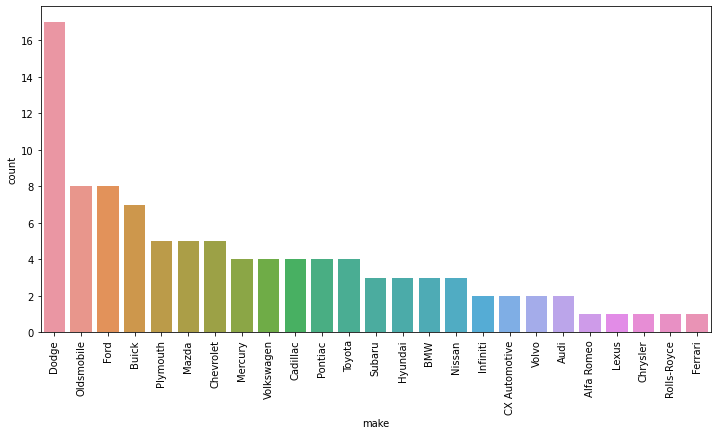

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='make', data=df, order=df['make'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


### 6. Fuel Type Distribution

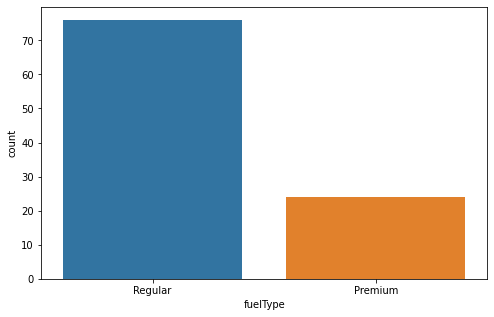

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='fuelType', data=df)
plt.show()


### 7. Transmission Type Analysis

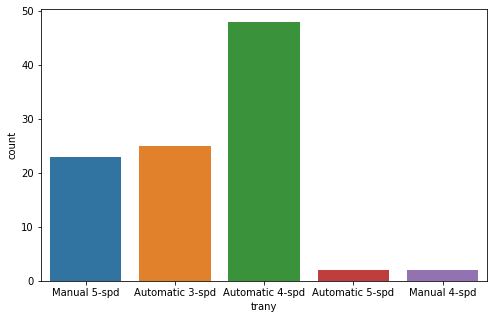

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='trany', data=df)
plt.show()


### 8. Fuel Efficiency Analysis

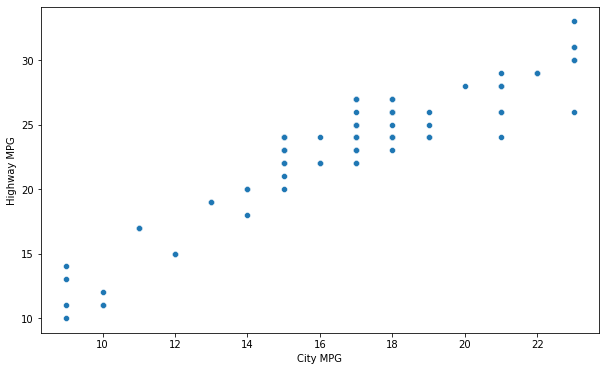

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city08', y='highway08', data=df)
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.show()


### 9. Temporal Trends

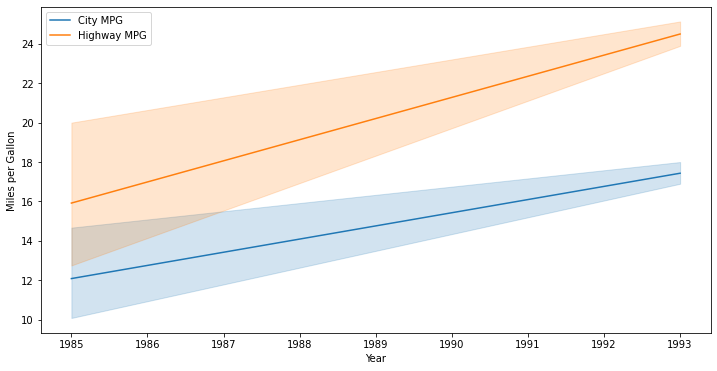

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='city08', data=df, label='City MPG')
sns.lineplot(x='year', y='highway08', data=df, label='Highway MPG')
plt.xlabel('Year')
plt.ylabel('Miles per Gallon')
plt.show()


### 10. Outlier Detection

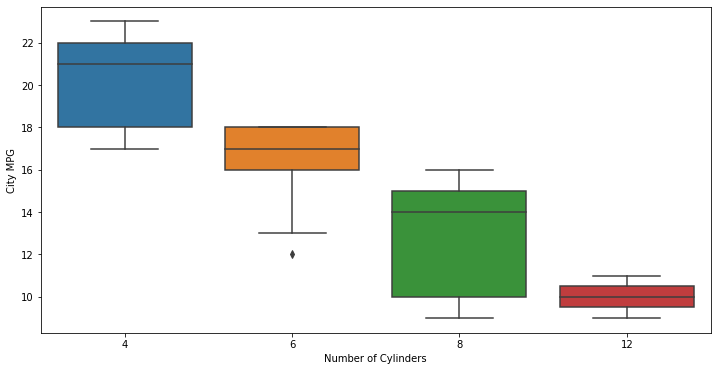

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='cylinders', y='city08', data=df)
plt.xlabel('Number of Cylinders')
plt.ylabel('City MPG')
plt.show()


### 11. Correlation Analysis

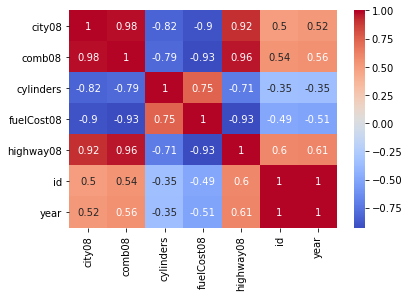

In [53]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### 12. Remove outliers using z-score

In [50]:
z_scores = stats.zscore(df['city08'])
df_cleaned = df[(z_scores < 3)]
df

,city08,comb08,cylinders,drive,fuelCost08,fuelType,highway08,id,make,model,mpgData,trany,year
0,19,21,4,Rear-Wheel Drive,2550,Regular,25,1,Alfa Romeo,Spider Veloce 2000,Y,Manual 5-spd,1985
1,9,11,12,Rear-Wheel Drive,4900,Regular,14,10,Ferrari,Testarossa,N,Manual 5-spd,1985
2,23,27,4,Front-Wheel Drive,2000,Regular,33,100,Dodge,Charger,Y,Manual 5-spd,1985
3,10,11,8,Rear-Wheel Drive,4900,Regular,12,1000,Dodge,B150/B250 Wagon 2WD,N,Automatic 3-spd,1985
4,17,19,4,4-Wheel or All-Wheel Drive,3550,Premium,23,10000,Subaru,Legacy AWD Turbo,N,Manual 5-spd,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17,20,6,Front-Wheel Drive,2700,Regular,25,10083,Pontiac,Grand Prix,Y,Automatic 3-spd,1993
96,17,20,6,Front-Wheel Drive,2700,Regular,27,10084,Pontiac,Grand Prix,N,Automatic 4-spd,1993
97,15,18,6,Front-Wheel Drive,3000,Regular,24,10085,Pontiac,Grand Prix,N,Automatic 4-spd,1993
98,15,18,6,Front-Wheel Drive,3000,Regular,24,10086,Pontiac,Grand Prix,N,Manual 5-spd,1993


### 13. Data Cleaning (check for missing values)

In [51]:
print(df.isnull().sum())

city08        0
comb08        0
cylinders     0
drive         0
fuelCost08    0
fuelType      0
highway08     0
id            0
make          0
model         0
mpgData       0
trany         0
year          0
dtype: int64


### 14. Count the number of occurrences for each fuel type

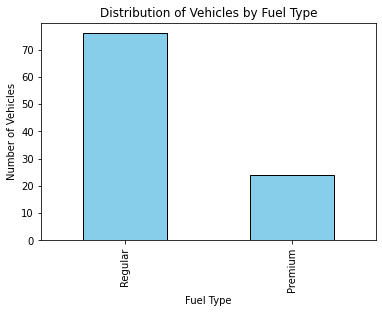

In [17]:
fuel_type_counts = df['fuelType'].value_counts()
 
# Plot a bar chart
fuel_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.show()

### 15. Visualize the distribution of vehicles over the years

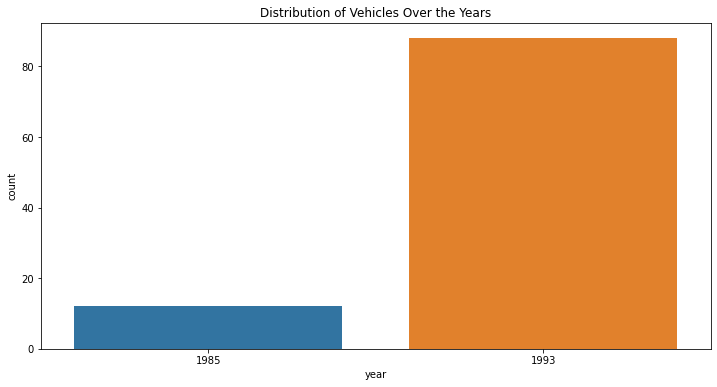

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df)
plt.title('Distribution of Vehicles Over the Years')
plt.show()

### 16. Group by year and calculate the mean fuel efficiency for both city and highway 

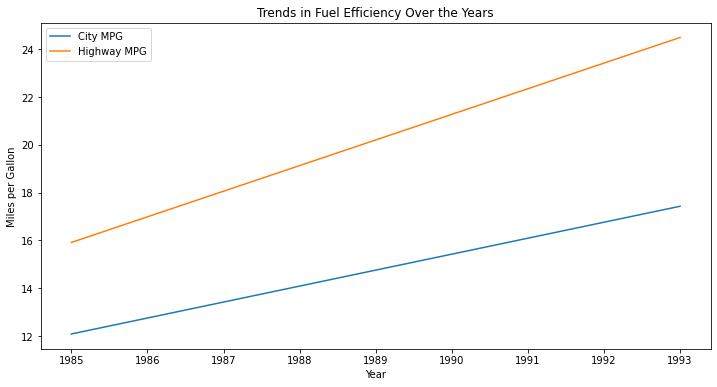

In [57]:
fuel_efficiency_trends = df.groupby('year')[['city08', 'highway08']].mean().reset_index()

# Plotting trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='city08', data=fuel_efficiency_trends, label='City MPG')
sns.lineplot(x='year', y='highway08', data=fuel_efficiency_trends, label='Highway MPG')
plt.title('Trends in Fuel Efficiency Over the Years')
plt.xlabel('Year')
plt.ylabel('Miles per Gallon')
plt.legend()
plt.show()

### 17. Crosstab Analysis: Fuel Type vs Cylinders

cylinders  4   6   8   12
fuelType                 
Premium     1  13  10   0
Regular    28  36  10   2


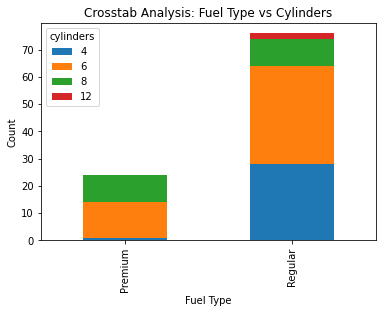

In [65]:
fuel_cylinders_crosstab = pd.crosstab(df['fuelType'], df['cylinders'])
 
print(fuel_cylinders_crosstab)
 
fuel_cylinders_crosstab.plot(kind='bar', stacked=True)
plt.title('Crosstab Analysis: Fuel Type vs Cylinders')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

### 18. Fuel Cost over the years

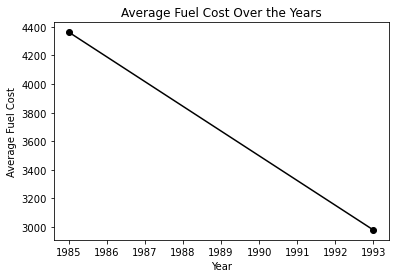

In [66]:
df_grouped = df.groupby('year')['fuelCost08'].mean()
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='black')
plt.title('Average Fuel Cost Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Fuel Cost')
plt.show()

### 19. Number of cylender used in each model type

In [67]:
df.groupby(['make','model'])['cylinders'].min()

make           model                     
Alfa Romeo     Spider Veloce 2000             4
Audi           100                            6
BMW            740i                           8
               740il                          8
               750il                         12
Buick          Century                        4
               Regal                          6
               Riviera                        6
CX Automotive  XM v6                          6
               XM v6a                         6
Cadillac       Eldorado                       8
               Seville                        8
Chevrolet      Lumina                         4
Chrysler       New Yorker                     6
Dodge          B150/B250 Wagon 2WD            8
               B350 Wagon 2WD                 8
               Charger                        4
               Dynasty                        4
               Spirit                         4
Ferrari        Testarossa                    1